# Exercise 1

Using Monte Carlo integration, check that

$$ \int_0^\infty dx \, x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

We have:

$$ \int_{-\infty}^\infty dx \, \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) = 1$$

i.e.:

$$ 2 \int_{0}^\infty dx \, \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) = 1$$

Therefore the integral can be re-written as:

$$ \frac{\sqrt{2\pi}\sigma}{2} \int_{0}^\infty dx \, x^3 \frac{2}{\sqrt{2\pi}\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right)$$

Now:

$$ p(x)= \frac{2}{\sqrt{2\pi}\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right)$$

$$ f(x)= x^3$$

In [1]:
import numpy as np
import pylab as plt
import scipy.stats

I draw $N = 100000$ data points from the probability distribution function $p(x)$ defined above, so that the mean is $\mu = 0$ and the standard deviation is an arbitrary number that I fix to $s = 1$ for the computations.

Then, I define the function $f(x)$ as $f(x)=x^3$, and I compute the integral.

In [2]:
N = 100000
mu = 0
s = 1

xi = 2*np.abs(np.random.normal(mu, s, N))/2

def fun(x):
    return x**3

I = (s*(np.pi/2)**0.5)*np.mean(fun(xi))

print('The value of the integral is: ', round(I/s**4, 2), 'sigma^4')

The value of the integral is:  2.0 sigma^4


N.B.: in the computation of $x_i$:
1. there is the absolute value because I am computing the integral between $0$ and $\infty$, therefore I am considering just the positive values of the Gaussian distribution.
2. the 2 at the numerator is because of the expression in $p(x)$. The 2 at the denominator is because of the over counting of the $x_i$ values: because I am using the absolute value, I am counting two times the $x_i$.

Does the result converge with the number of samples? And how does the error go down?

I introduce an array $M$ of samples, an array of integral's results and one of errors. For each number of samples I compute the corresponding values of the integral and the error, and I scatter the results.

Number of samples:  10  Value of the integral: 5.9544  Error: 0.3162
Number of samples:  500  Value of the integral: 2.1115  Error: 0.0447
Number of samples:  5000  Value of the integral: 1.9129  Error: 0.0141
Number of samples:  20000  Value of the integral: 2.0164  Error: 0.0071
Number of samples:  45000  Value of the integral: 2.0067  Error: 0.0047
Number of samples:  75000  Value of the integral: 2.0064  Error: 0.0037


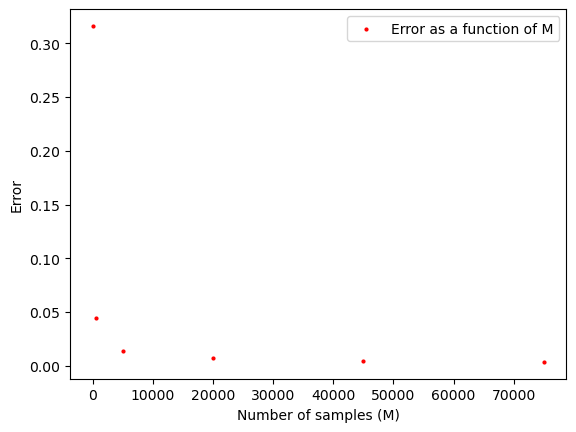

In [3]:
M = [10, 500, 5000, 20000, 45000, 75000]
integral = []
error = []

for m in M:
    Xi = np.abs(np.random.normal(mu, s, m))
    
    integral.append((s*(np.pi/2)**0.5)*np.mean(fun(Xi))/s**4)
    error.append(s/(m)**0.5)

i = 0
for i in range(len(M)):
    print('Number of samples: ', M[i], f' Value of the integral: {integral[i]:.4f}', f' Error: {error[i]:.4f}')
    i = i+1
    
plt.scatter(M, error, color='red', s=4, label='Error as a function of M')
plt.xlabel('Number of samples (M)')
plt.ylabel('Error')
plt.legend()
plt.show()

For a given N, how are the results distributed? Try to fit it by hand with a parametrized model. How does the distribution change if N increases?

I repeat the measurements for each $M[i]$ a number of times equal to $rep=1000$, and I arbitrarly choose an index $k$ (in this case $k=4$) that spans between the elements of $M$, i.e. I choose an arbitrary value for the number of samples and I compute the distribution of the results of the integral.

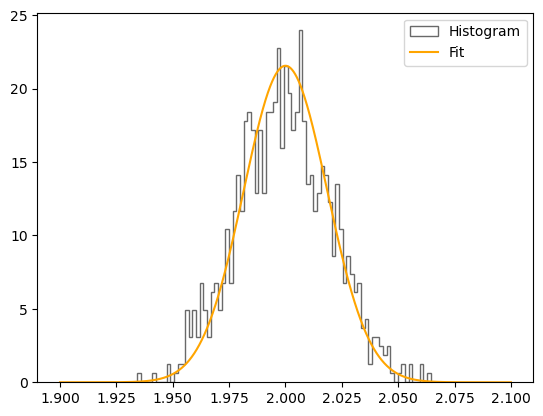

In [4]:
rep = 1000
Integral = []
k = 4

j = 0
for j in range(rep):
    X = np.abs(np.random.normal(mu, s, M[k]))
    Integral.append((s*(np.pi/2)**0.5)*np.mean(fun(X))/s**4)

plt.hist(Integral, bins=80, edgecolor='dimgrey', histtype='step', density=True, label='Histogram')

z = np.random.uniform(1.9, 2.1, N)
z.sort()
sigma = 0.0185  # value chosen by hand
y = np.exp(-(z-2)*(z-2)/(2*sigma*sigma))/(sigma*(2*np.pi)**0.5)  # fit with a Gaussian distribution
plt.plot(z, y, color='orange', label='Fit')
plt.legend()
plt.show()

# N.B.: if I change k I need to change also the value of sigma (the distribution changes)

This is for a high value of $N$ ($N=45000$). Let's try with $N=400$.

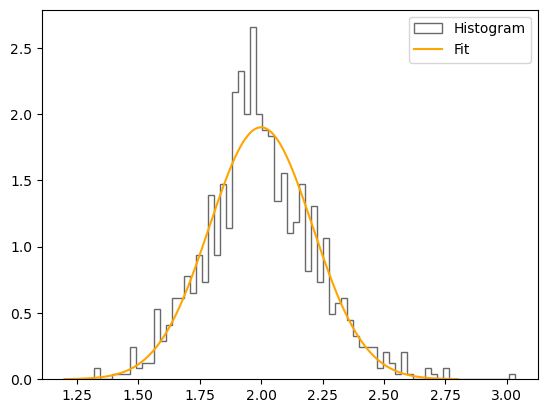

In [5]:
N1 = 400
Integral1 = []

j = 0
for j in range(rep):
    X = np.abs(np.random.normal(mu, s, N1))
    Integral1.append((s*(np.pi/2)**0.5)*np.mean(fun(X))/s**4)

plt.hist(Integral1, bins=70, edgecolor='dimgrey', histtype='step', density=True, label='Histogram')

z1 = np.random.uniform(1.2, 2.8, N)
z1.sort()
sigma1 = 0.21
y1 = np.exp(-(z1-2)*(z1-2)/(2*sigma1*sigma1))/(sigma1*(2*np.pi)**0.5)
plt.plot(z1, y1, color='orange', label='Fit')
plt.legend()
plt.show()